In [2]:
# Import essential libraries for data manipulation and analysis
import numpy as np  # For numerical operations
import pandas as pd  # For handling data frames and CSV file I/O
import pprint  # For pretty printing

# Import libraries for data visualization
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For plotting
import plotly.express as px  # For interactive data visualization

# Import libraries for preprocessing and model evaluation
from sklearn.preprocessing import OneHotEncoder, StandardScaler, RobustScaler, LabelEncoder  # Encoding categorical variables and scaling
from sklearn.model_selection import train_test_split, StratifiedKFold  # Splitting data and cross-validation
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, classification_report, confusion_matrix  # Model evaluation metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV  # For hyperparameter tuning

# Import imbalanced data handling library
from imblearn.over_sampling import SMOTE  # For handling class imbalance by over-sampling the minority class


# Import LightGBM (Light Gradient Boosting Machine) library
import lightgbm as lgb  # The primary algorithm for boosting
from lightgbm import early_stopping # Import the early_stopping callback

#Ensembling Algorithms
from sklearn.ensemble import RandomForestClassifier  # Bagging algorithm for ensemble
from sklearn.ensemble import GradientBoostingClassifier  # Another boosting algorithm for ensemble
from sklearn.ensemble import StackingClassifier  # For stacking ensemble
from sklearn.tree import DecisionTreeClassifier

# Additional utilities for visualization and interpretation
from lightgbm import plot_importance  # For visualizing feature importance


# Importing Libraries

## Exploratory Data Analyses

1. To access the dataset from the local storage
We need to mount the drive1

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
cd /content/drive/MyDrive/Loan-Approval-Prediction/

/content/drive/MyDrive/Loan-Approval-Prediction


2. Read the Data

In [5]:
df = pd.read_csv('loan_dataset.csv')

In [6]:
#to view the contents
df.head()

,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,interest_rate,inflation_rate,season_of_application,loan_status
0,1,3,Not Graduate,Yes,6800000,16900000,18,628,3600000,900000,15600000,4900000,6.152574,2.547616,Winter,approved
1,2,5,Not Graduate,No,7000000,21800000,4,631,8100000,7100000,14600000,10000000,5.127230,2.904473,Summer,approved
2,3,2,Not Graduate,No,8400000,28300000,10,822,1800000,16000000,33000000,4400000,6.147710,3.487231,Winter,approved
3,4,1,Graduate,Yes,9600000,34100000,20,828,26100000,19000000,20800000,12400000,4.959403,2.247446,Summer,approved
4,5,2,Graduate,No,9600000,22500000,18,851,7400000,16200000,24300000,12700000,2.897502,1.781279,Spring,approved


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 16 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   loan_id                   4200 non-null   int64  
 1   no_of_dependents          4200 non-null   int64  
 2   education                 4200 non-null   object 
 3   self_employed             4200 non-null   object 
 4   income_annum              4200 non-null   int64  
 5   loan_amount               4200 non-null   int64  
 6   loan_term                 4200 non-null   int64  
 7   cibil_score               4200 non-null   int64  
 8   residential_assets_value  4200 non-null   int64  
 9   commercial_assets_value   4200 non-null   int64  
 10  luxury_assets_value       4200 non-null   int64  
 11  bank_asset_value          4200 non-null   int64  
 12  interest_rate             4200 non-null   float64
 13  inflation_rate            4200 non-null   float64
 14  season_o

3. Changing the column names

In [8]:
df.columns = ['loan_id', 'dependents', 'education', 'self_employed', 'annual_income', 'loan_amount', 'loan_term',
              'credit_score', 'residential_av', 'commercial_av', 'luxury_av', 'bank_av',
              'interest_rate', 'inflation_rate', 'season', 'loan_status']

In [9]:
#Updating metadata for collaboration
metadata_dict = {
'loan_id'        : 'loan ID number',
'dependents'     : 'number of dependents',
'education'      : 'education status (graduate/not graduate)',
'self_employed'  : 'self-employed status',
'annual_income'  : 'self-reported annual income',
'loan_amount'    : 'loan amount',
'loan_term'      : 'loan term in year',
'credit_score'   : 'credit score (Indian cibil score system, range 300-900)',
'residential_av' : 'residential assets value',
'commercial_av'  : 'commercial assets value',
'luxury_av'      : 'luxury assets value',
'bank_av'        : 'bank assets value',
'interest_rate'  : 'current interest rate',
'inflation_rate' : 'inflation rate of market trend',
'season'         : 'season of the year',
'loan_status'    : 'loan status (approved/rejected)'
}

In [10]:
df.head()

,loan_id,dependents,education,self_employed,annual_income,loan_amount,loan_term,credit_score,residential_av,commercial_av,luxury_av,bank_av,interest_rate,inflation_rate,season,loan_status
0,1,3,Not Graduate,Yes,6800000,16900000,18,628,3600000,900000,15600000,4900000,6.152574,2.547616,Winter,approved
1,2,5,Not Graduate,No,7000000,21800000,4,631,8100000,7100000,14600000,10000000,5.127230,2.904473,Summer,approved
2,3,2,Not Graduate,No,8400000,28300000,10,822,1800000,16000000,33000000,4400000,6.147710,3.487231,Winter,approved
3,4,1,Graduate,Yes,9600000,34100000,20,828,26100000,19000000,20800000,12400000,4.959403,2.247446,Summer,approved
4,5,2,Graduate,No,9600000,22500000,18,851,7400000,16200000,24300000,12700000,2.897502,1.781279,Spring,approved


In [11]:
for columns in df.columns:
    pprint.pprint(columns)

'loan_id'
'dependents'
'education'
'self_employed'
'annual_income'
'loan_amount'
'loan_term'
'credit_score'
'residential_av'
'commercial_av'
'luxury_av'
'bank_av'
'interest_rate'
'inflation_rate'
'season'
'loan_status'


# Cleaning Data

In [12]:
# Removing White spaces
df = df.map(lambda x: x.strip() if isinstance(x, str) else x)


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   loan_id         4200 non-null   int64  
 1   dependents      4200 non-null   int64  
 2   education       4200 non-null   object 
 3   self_employed   4200 non-null   object 
 4   annual_income   4200 non-null   int64  
 5   loan_amount     4200 non-null   int64  
 6   loan_term       4200 non-null   int64  
 7   credit_score    4200 non-null   int64  
 8   residential_av  4200 non-null   int64  
 9   commercial_av   4200 non-null   int64  
 10  luxury_av       4200 non-null   int64  
 11  bank_av         4200 non-null   int64  
 12  interest_rate   4200 non-null   float64
 13  inflation_rate  4200 non-null   float64
 14  season          4200 non-null   object 
 15  loan_status     4200 non-null   object 
dtypes: float64(2), int64(10), object(4)
memory usage: 525.1+ KB


In [14]:
print(f"Duplicated data: {df.duplicated().sum()}")
print(f"Data shape: {df.shape}")
print(f"Null data: {df.isnull().sum().sum()}")

Duplicated data: 0
Data shape: (4200, 16)
Null data: 0


In [15]:
df.describe().round(1).T


,count,mean,std,min,25%,50%,75%,max
loan_id,4200.0,2100.5,1212.6,1.0,1050.8,2100.5,3150.2,4200.0
dependents,4200.0,2.5,1.7,0.0,1.0,3.0,4.0,5.0
annual_income,4200.0,5094547.6,2826222.1,200000.0,2600000.0,5100000.0,7600000.0,9900000.0
loan_amount,4200.0,15364476.2,9147163.6,300000.0,7800000.0,14700000.0,22225000.0,39500000.0
loan_term,4200.0,10.4,5.8,2.0,6.0,10.0,16.0,20.0
credit_score,4200.0,644.8,161.2,300.0,538.0,661.0,778.0,900.0
residential_av,4200.0,7672690.5,6740919.1,-100000.0,2200000.0,5700000.0,11700000.0,29100000.0
commercial_av,4200.0,5077857.1,4476420.2,0.0,1300000.0,3700000.0,7900000.0,19400000.0
luxury_av,4200.0,15171071.4,9103180.5,300000.0,7500000.0,14600000.0,21800000.0,39200000.0
bank_av,4200.0,5038285.7,3284041.8,0.0,2400000.0,4600000.0,7200000.0,14600000.0


1. There 4200 Diffrent Loan ID, So Drop that **column**

In [16]:
df.drop('loan_id', axis=1, inplace=True)


In [17]:
df.head(3)

,dependents,education,self_employed,annual_income,loan_amount,loan_term,credit_score,residential_av,commercial_av,luxury_av,bank_av,interest_rate,inflation_rate,season,loan_status
0,3,Not Graduate,Yes,6800000,16900000,18,628,3600000,900000,15600000,4900000,6.152574,2.547616,Winter,approved
1,5,Not Graduate,No,7000000,21800000,4,631,8100000,7100000,14600000,10000000,5.127230,2.904473,Summer,approved
2,2,Not Graduate,No,8400000,28300000,10,822,1800000,16000000,33000000,4400000,6.147710,3.487231,Winter,approved


# Data Visualization

1. Explore each feature through visualization


In [18]:
for col in df.columns:
    print(f"\n'{col}'")

    # Print unique values for columns that have 10 or fewer unique values
    if df[col].nunique() <= 10:

        # Print all unique value count
        print(f"\tUnique value count: {df[col].nunique()}")

        # Print unique values
        print(f"\tUnique values: {df[col].unique()}")

        # Create pie chart for columns with 2 or fewer unique values
        if df[col].nunique() <= 2:
            fig = px.pie(names=df[col].value_counts().index,
                         values=df[col].value_counts().values,
                         width=600, height=400)
            fig.update_traces(text=df[col].value_counts().values, textposition='inside')
            fig.show()

        # Create bar chart for columns with more than 2 unique values
        elif df[col].nunique() > 2:
            fig = px.bar(x=df[col].value_counts().index,
                         y=df[col].value_counts().values,
                         labels={'x': col, 'y': 'count / frequency'},
                         width=600, height=400)
            fig.update_traces(text=df[col].value_counts().values, textposition='inside')
            fig.update_layout(xaxis=dict(tickmode='array',
                                         tickvals=df[col].value_counts().index,
                                         ticktext=df[col].value_counts().index))
            fig.show()

    # Create histogram for columns with more than 10 unique values and less than or equal to the data length
    elif df[col].nunique() > 10 and df[col].nunique() <= len(df):

        # Print mean and standard deviation of the column
        print(f"\tStandard deviation: {round(df[col].std(), 2)}")
        print(f"\tMean: {round(df[col].mean(), 2)}")

        fig = px.histogram(df, x=col)
        fig.update_layout(xaxis_title=col, yaxis_title='count / frequency',
                          width=600, height=400)
        fig.show()

    print("\n" + ("-" * 80))


'dependents'
	Unique value count: 6
	Unique values: [3 5 2 1 4 0]



--------------------------------------------------------------------------------

'education'
	Unique value count: 2
	Unique values: ['Not Graduate' 'Graduate']



--------------------------------------------------------------------------------

'self_employed'
	Unique value count: 2
	Unique values: ['Yes' 'No']



--------------------------------------------------------------------------------

'annual_income'
	Standard deviation: 2826222.14
	Mean: 5094547.62



--------------------------------------------------------------------------------

'loan_amount'
	Standard deviation: 9147163.63
	Mean: 15364476.19



--------------------------------------------------------------------------------

'loan_term'
	Unique value count: 10
	Unique values: [18  4 10 20 12  6  8 14 16  2]



--------------------------------------------------------------------------------

'credit_score'
	Standard deviation: 161.21
	Mean: 644.81



--------------------------------------------------------------------------------

'residential_av'
	Standard deviation: 6740919.07
	Mean: 7672690.48



--------------------------------------------------------------------------------

'commercial_av'
	Standard deviation: 4476420.21
	Mean: 5077857.14



--------------------------------------------------------------------------------

'luxury_av'
	Standard deviation: 9103180.54
	Mean: 15171071.43



--------------------------------------------------------------------------------

'bank_av'
	Standard deviation: 3284041.81
	Mean: 5038285.71



--------------------------------------------------------------------------------

'interest_rate'
	Standard deviation: 1.5
	Mean: 5.0



--------------------------------------------------------------------------------

'inflation_rate'
	Standard deviation: 0.97
	Mean: 2.5



--------------------------------------------------------------------------------

'season'
	Unique value count: 4
	Unique values: ['Winter' 'Summer' 'Spring' 'Fall']



--------------------------------------------------------------------------------

'loan_status'
	Unique value count: 2
	Unique values: ['approved' 'rejected']



--------------------------------------------------------------------------------


# Data correlation and matrix heatmap




In [19]:
df_corr = df.corr(numeric_only=True)

In [20]:
print(df_corr)

                dependents  annual_income  loan_amount  loan_term  \
dependents        1.000000      -0.005648    -0.012981   0.008447   
annual_income    -0.005648       1.000000     0.929769   0.004157   
loan_amount      -0.012981       0.929769     1.000000  -0.018541   
loan_term         0.008447       0.004157    -0.018541   1.000000   
credit_score     -0.014220      -0.018685    -0.029922   0.105525   
residential_av    0.011211       0.643807     0.606564   0.017234   
commercial_av    -0.023975       0.648462     0.615605  -0.026195   
luxury_av        -0.015436       0.926025     0.859670   0.012650   
bank_av           0.005507       0.854300     0.796569  -0.010162   
interest_rate     0.008615      -0.026017    -0.011920  -0.010184   
inflation_rate   -0.007769      -0.011903    -0.018524   0.012455   

                credit_score  residential_av  commercial_av  luxury_av  \
dependents         -0.014220        0.011211      -0.023975  -0.015436   
annual_income      -0.0

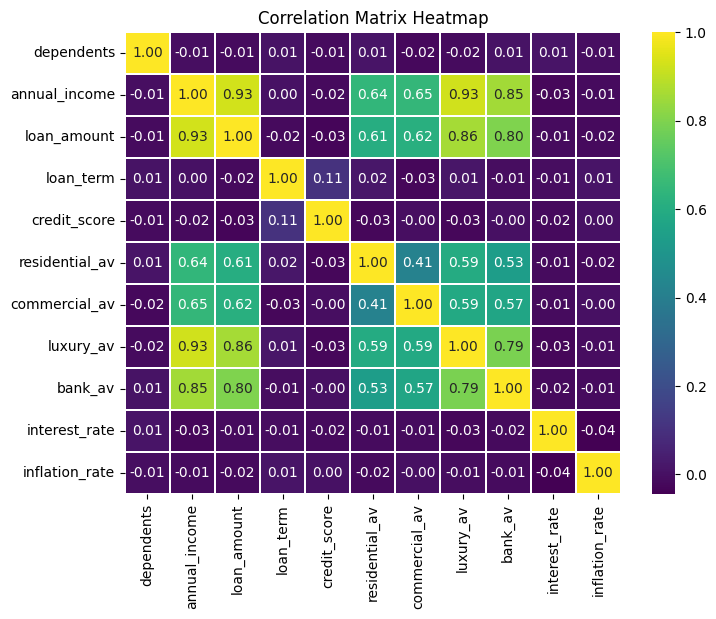

In [21]:
# Creating Heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(df_corr, annot=True, cmap='viridis', fmt='.2f', linewidths=0.01)
plt.title("Correlation Matrix Heatmap")
plt.show()

Visualize the data using plots which corr>0.5

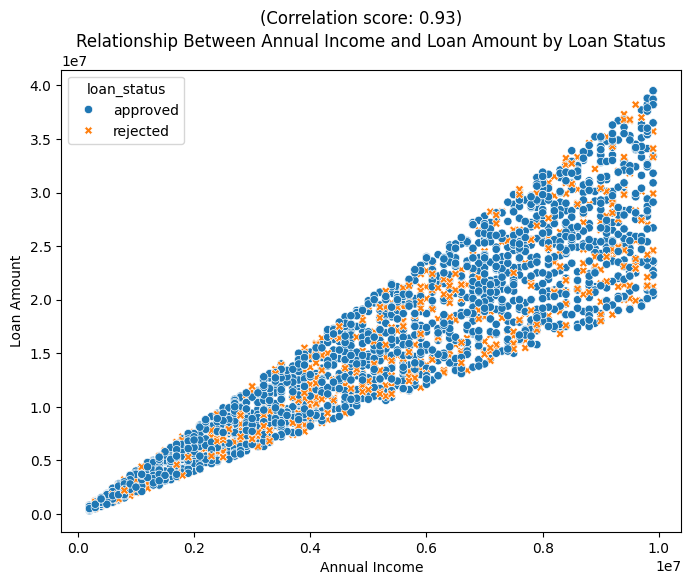

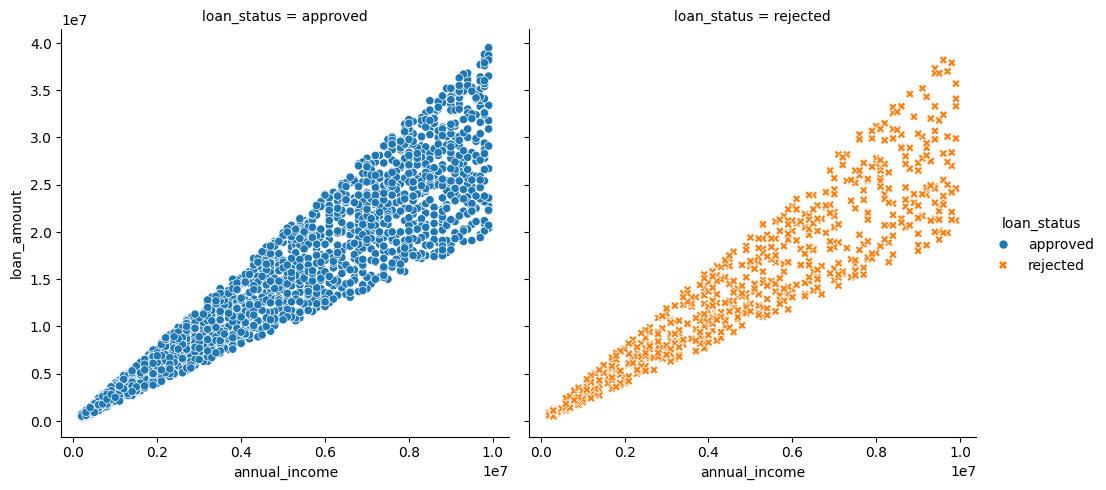

In [22]:
plt.figure(figsize=(8, 6))
sns.scatterplot(df, x='annual_income', y='loan_amount', hue='loan_status', style='loan_status')
plt.title('Relationship Between Annual Income and Loan Amount by Loan Status')
plt.suptitle("(Correlation score: 0.93)")
plt.xlabel('Annual Income')
plt.ylabel('Loan Amount')
plt.show()

sns.relplot(df, x="annual_income", y="loan_amount", col="loan_status", hue="loan_status", style="loan_status", kind="scatter")
plt.show()

Relationship between Loan Amount/Annual Income and Combined Assets Value

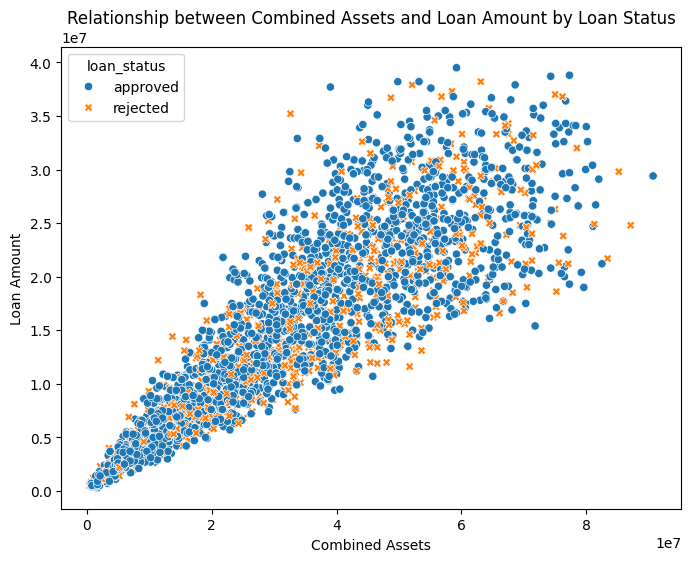

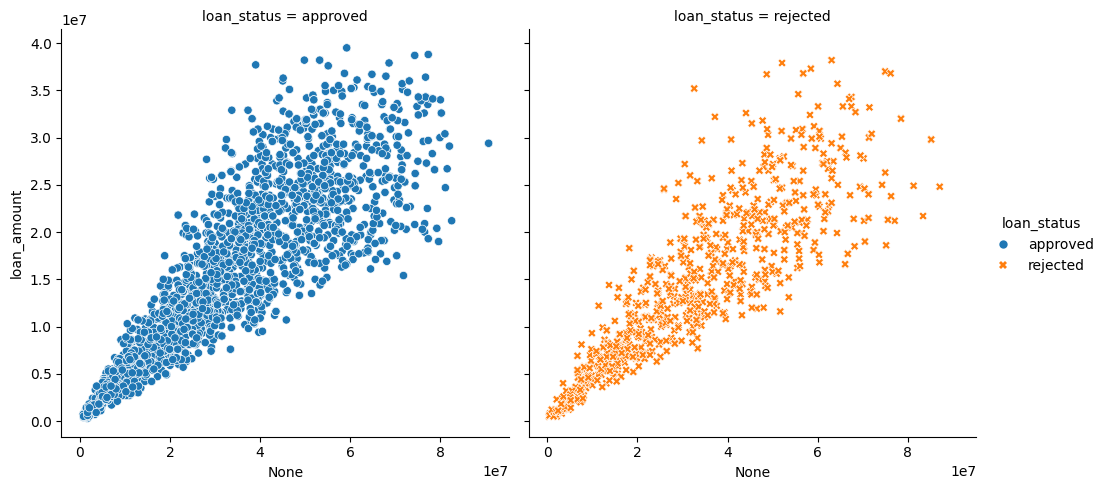


------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------



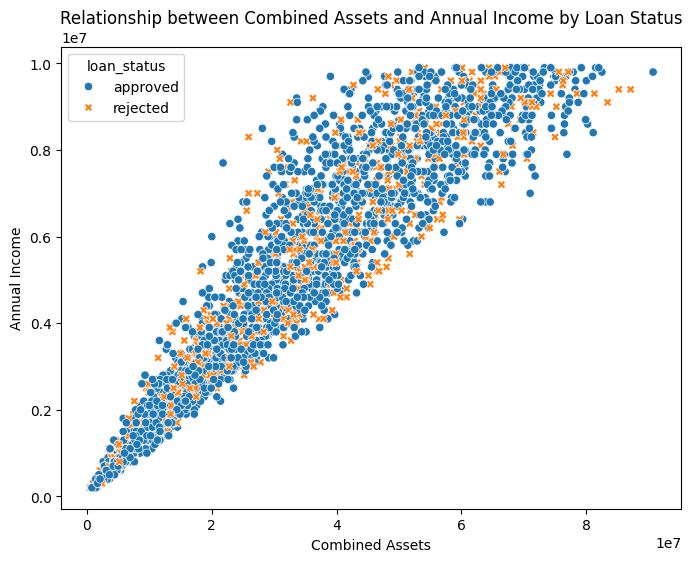

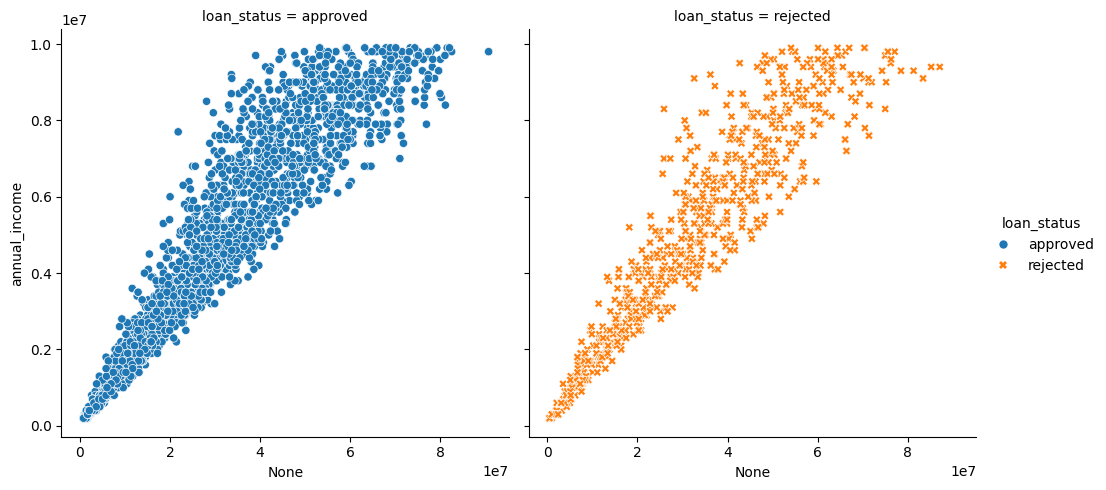


------------------------------------------------------------------------------------------------------------------------------------------
------------------------------------------------------------------------------------------------------------------------------------------



In [23]:
combined_av = df.apply(lambda row: row['residential_av']+row['commercial_av']+row['bank_av']+row['luxury_av'], axis=1)
for col, name in {'loan_amount':'Loan Amount', 'annual_income':'Annual Income'}.items():
    plt.figure(figsize=(8,6))
    sns.scatterplot(df, x=combined_av, y=col, hue='loan_status', style='loan_status')
    plt.title(f"Relationship between Combined Assets and {name} by Loan Status")
    plt.xlabel('Combined Assets')
    plt.ylabel(name)
    plt.show()
    sns.relplot(df, x=combined_av, y=col, col="loan_status", hue="loan_status", style="loan_status", kind="scatter")
    plt.show()
    print("\n" + "-"*138)
    print("-"*138 + "\n")

In [24]:
# Calculate counts for each combination of loan_term and loan_status
count_term_status = df.groupby(['loan_term', 'loan_status']).size().reset_index(name='count')

# Calculate total counts for each loan_term
total_counts = count_term_status.groupby('loan_term')['count'].sum().reset_index(name='total_count')

# Merge total counts with the count_term_status to calculate percentages
count_term_status = count_term_status.merge(total_counts, on='loan_term')
count_term_status['percentage'] = (count_term_status['count'] / count_term_status['total_count'] * 100).round(0).astype(int)

#create a string of value of percentage
count_term_status['count_percentage'] = count_term_status['count'].astype(str).str.cat(count_term_status['percentage'].astype(str), sep='<br>(') + '%)'

# Data Visualization - 2

In [25]:
# Create a bar chart
fig = px.bar(count_term_status, x='loan_term', y='count', color='loan_status', text='count_percentage', width=700, height=500)

# Update x labels
fig.update_xaxes(tickangle=0, tickmode='array', tickvals=count_term_status['loan_term'], ticktext=count_term_status['loan_term'])

# Update layout for better visual appearance
fig.update_layout(xaxis_title = 'Loan Term in Year',
                  yaxis_title = 'Count',
                  title = {"text":"Loan Term Count by Status",
                           "font":{'size': 18, 'color': 'black', 'weight':'bold'},
                           "x":0.5,
                           "xanchor": "center"})

# Update traces to show text labels inside the bars with bold font
fig.update_traces(texttemplate='%{text}',
                  textposition='inside',
                  textfont=dict(size=9, color="white", weight="normal"))

# Add total count labels as an additional trace
for _, row in total_counts.iterrows():
    fig.add_annotation(
        x=row['loan_term'],
        y=row['total_count'],
        text=f"{row['total_count']}",
        showarrow=False,
        yshift=10,
        font=dict(size=10, color="black", weight="bold"),
        align="center")

# Show the figure
fig.show()

* The likelihood of approval for applicants is higher, at over 80%, when applying for shorter loan terms of 2-4 years.

* Loans with a term of 6 years or more have an average approval rate of 57%, making it more probable to get approved than denied.

**Histograms for Loan Amount, Annual Income, and Credit Score by Loan status**

In [26]:
# Histograms for Loan Amount, Annual Income, and Credit Score by Loan Status
for col in df[['loan_amount', 'annual_income', 'credit_score']]:
    fig = px.histogram(df, x=col, color='loan_status', width=800, height=600)
    fig.show()

In [27]:
# Histograms for interest_rate and inflation_rate by Loan Status
for col in df[['interest_rate', 'inflation_rate']]:
    fig = px.histogram(df, x=col, color='loan_status', width=800, height=600)
    fig.show()

# Data PreProcessing

1. Data *Encoding*

In [28]:
# Convert loan tearm in years to days:
df['loan_term'] = df['loan_term']*365

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4200 entries, 0 to 4199
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   dependents      4200 non-null   int64  
 1   education       4200 non-null   object 
 2   self_employed   4200 non-null   object 
 3   annual_income   4200 non-null   int64  
 4   loan_amount     4200 non-null   int64  
 5   loan_term       4200 non-null   int64  
 6   credit_score    4200 non-null   int64  
 7   residential_av  4200 non-null   int64  
 8   commercial_av   4200 non-null   int64  
 9   luxury_av       4200 non-null   int64  
 10  bank_av         4200 non-null   int64  
 11  interest_rate   4200 non-null   float64
 12  inflation_rate  4200 non-null   float64
 13  season          4200 non-null   object 
 14  loan_status     4200 non-null   object 
dtypes: float64(2), int64(9), object(4)
memory usage: 492.3+ KB


In [30]:
categorical_features = ['education', 'self_employed', 'loan_status']
categorical_df = df[categorical_features]

2. Encode Categorical Features

In [31]:
def encoder(dataframe, features):
    encoder = OneHotEncoder(sparse_output=False)
    encoded_data = encoder.fit_transform(dataframe)
    encoded_dataframe = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out())
    return encoded_dataframe

In [32]:
encoded_df = encoder(categorical_df, categorical_features)
encoded_df.head(2)

,education_Graduate,education_Not Graduate,self_employed_No,self_employed_Yes,loan_status_approved,loan_status_rejected
0,0.0,1.0,0.0,1.0,1.0,0.0
1,0.0,1.0,1.0,0.0,1.0,0.0


In [33]:
labeled_features = ['season']
labeled_df = df[labeled_features]
print(labeled_df.head(10))
print(labeled_features)

   season
0  Winter
1  Summer
2  Winter
3  Summer
4  Spring
5  Winter
6    Fall
7  Summer
8  Summer
9  Summer
['season']


In [34]:

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Apply the label encoder to the 'season' column and store in a new DataFrame
encoded_df_2 = df[['season']].copy()  # Copy the 'season' column into a new DataFrame
encoded_df_2['season_encoded'] = label_encoder.fit_transform(df['season'])

# Display the first few rows to verify
print(encoded_df_2.head(10))


   season  season_encoded
0  Winter               3
1  Summer               2
2  Winter               3
3  Summer               2
4  Spring               1
5  Winter               3
6    Fall               0
7  Summer               2
8  Summer               2
9  Summer               2


In [35]:
# Drop the original 'season' column and keep the 'season_encoded' column
encoded_df_2.drop('season', axis=1, inplace=True)

# Display the updated DataFrame
print(encoded_df_2.head())

   season_encoded
0               3
1               2
2               3
3               2
4               1


In [36]:
print(encoded_df.head())
print(encoded_df_2.head())

   education_Graduate  education_Not Graduate  self_employed_No  \
0                 0.0                     1.0               0.0   
1                 0.0                     1.0               1.0   
2                 0.0                     1.0               1.0   
3                 1.0                     0.0               0.0   
4                 1.0                     0.0               1.0   

   self_employed_Yes  loan_status_approved  loan_status_rejected  
0                1.0                   1.0                   0.0  
1                0.0                   1.0                   0.0  
2                0.0                   1.0                   0.0  
3                1.0                   1.0                   0.0  
4                0.0                   1.0                   0.0  
   season_encoded
0               3
1               2
2               3
3               2
4               1


In [37]:
# Concatenate the two DataFrames based on the columns you want to keep
final_encoded_df = pd.concat([encoded_df[['education_Graduate', 'self_employed_Yes']],
                              encoded_df_2[['season_encoded']], encoded_df[['loan_status_approved']]], axis=1)

# Display the final DataFrame
print(final_encoded_df.head())


   education_Graduate  self_employed_Yes  season_encoded  loan_status_approved
0                 0.0                1.0               3                   1.0
1                 0.0                0.0               2                   1.0
2                 0.0                0.0               3                   1.0
3                 1.0                1.0               2                   1.0
4                 1.0                0.0               1                   1.0


In [38]:
final_encoded_df.columns = ['education', 'self_employed', 'season', 'loan_status']

In [39]:
# Make a copy from original df and assign it to df_w_encode
df_w_encode = df.copy()
# Replace catergorical data with encoding data from encoded_df
# -- The problem was using combined_features as the key.
# -- Instead, we need to assign the columns of final_encoded_df to new columns in df_w_encode.
for col in final_encoded_df.columns:
    df_w_encode[col] = final_encoded_df[col]
# Show:
print(df_w_encode.head(2))


   dependents  education  self_employed  annual_income  loan_amount  \
0           3        0.0            1.0        6800000     16900000   
1           5        0.0            0.0        7000000     21800000   

   loan_term  credit_score  residential_av  commercial_av  luxury_av  \
0       6570           628         3600000         900000   15600000   
1       1460           631         8100000        7100000   14600000   

    bank_av  interest_rate  inflation_rate  season  loan_status  
0   4900000       6.152574        2.547616       3          1.0  
1  10000000       5.127230        2.904473       2          1.0  


In [40]:
# df_w_encode = df_w_encode.drop(df.columns[-2:], axis=1)
# df_w_encode.head()

3. Data Scaling

In [41]:
numerical_features = ['annual_income', 'loan_amount', 'loan_term', 'credit_score',
                      'residential_av', 'commercial_av', 'luxury_av', 'bank_av', 'interest_rate', 'inflation_rate']
df_w_numerical = df_w_encode[numerical_features]

In [42]:
rb_scaler = RobustScaler(quantile_range=(20,80))  # default quantile_range=(25,75)
rb_scaler.fit(df_w_numerical)

RobustScaler(quantile_range=(20, 80))

In [43]:
# bring scaled data into dataframe
df_w_numerical_scaled = pd.DataFrame(rb_scaler.transform(df_w_numerical), columns=df_w_numerical.columns)
# Make a copy
df_w_encode_numerical_scaled = df_w_encode.copy()
# Assign the scaled features back to the dataframe with encode
df_w_encode_numerical_scaled[numerical_features] = df_w_numerical_scaled[numerical_features]

In [44]:
df_w_encode_numerical_scaled.describe().round(1).T


,count,mean,std,min,25%,50%,75%,max
dependents,4200.0,2.5,1.7,0.0,1.0,3.0,4.0,5.0
education,4200.0,0.5,0.5,0.0,0.0,0.0,1.0,1.0
self_employed,4200.0,0.5,0.5,0.0,0.0,1.0,1.0,1.0
annual_income,4200.0,-0.0,0.5,-0.8,-0.4,0.0,0.4,0.8
loan_amount,4200.0,0.0,0.5,-0.8,-0.4,0.0,0.4,1.4
loan_term,4200.0,0.0,0.5,-0.7,-0.3,0.0,0.5,0.8
credit_score,4200.0,-0.1,0.5,-1.2,-0.4,0.0,0.4,0.8
residential_av,4200.0,0.2,0.6,-0.5,-0.3,0.0,0.5,2.0
commercial_av,4200.0,0.2,0.6,-0.5,-0.3,0.0,0.5,2.0
luxury_av,4200.0,0.0,0.5,-0.8,-0.4,0.0,0.4,1.4


In [45]:
df_w_encode_numerical_scaled.head(2)


,dependents,education,self_employed,annual_income,loan_amount,loan_term,credit_score,residential_av,commercial_av,luxury_av,bank_av,interest_rate,inflation_rate,season,loan_status
0,3,0.0,1.0,0.293103,0.125714,0.666667,-0.107843,-0.176174,-0.350,0.057803,0.049020,0.458991,0.038759,3,1.0
1,5,0.0,0.0,0.327586,0.405714,-0.500000,-0.098039,0.201342,0.425,0.000000,0.882353,0.057257,0.253832,2,1.0


# Data Splitting

In [46]:
x = df_w_encode_numerical_scaled.drop('loan_status', axis=1)
y = df_w_encode_numerical_scaled['loan_status']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=28, stratify=y)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(3360, 14) (840, 14) (3360,) (840,)


### Model Choosing

#### Model Training

In [47]:
lightgbm_model = lgb.LGBMClassifier(
    class_weight="balanced",
    num_leaves=30,
    max_depth=8,
    min_data_in_leaf=20,
    reg_alpha=0.1,
    reg_lambda=0.1,
    force_col_wise=True             # Add this line to force column-wise multithreading
)

In [50]:
!pip install --upgrade lightgbm
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", category=UserWarning)

# Instead of lgb.set_config(verbosity=-1), use the 'verbose' parameter within the LGBMClassifier constructor:
lightgbm_model = lgb.LGBMClassifier(
    class_weight="balanced",
    num_leaves=30,
    max_depth=8,
    min_data_in_leaf=20,
    reg_alpha=0.1,
    reg_lambda=0.1,
    verbose=-1  # Set verbosity here
)




lightgbm_model.fit(
    x_train, y_train,
    eval_set=[(x_test, y_test)],
    eval_metric='logloss',
)

LGBMClassifier(class_weight='balanced', max_depth=8, min_data_in_leaf=20,
               num_leaves=30, reg_alpha=0.1, reg_lambda=0.1, verbose=-1)

In [51]:
y_pred = lightgbm_model.predict(x_test)
print('\troc_auc_score ',round(roc_auc_score(y_pred, y_test),3))
print('\tf1_score ',round(f1_score(y_pred, y_test),3))
print("\n" + classification_report(y_pred, y_test))

	roc_auc_score  0.992
	f1_score  0.996

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       170
         1.0       1.00      1.00      1.00       670

    accuracy                           0.99       840
   macro avg       0.99      0.99      0.99       840
weighted avg       0.99      0.99      0.99       840



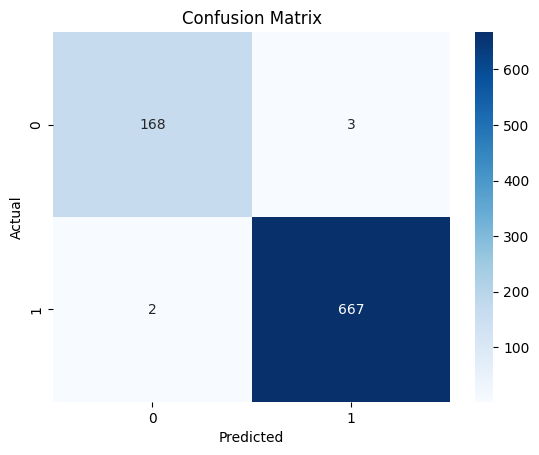

In [52]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

# Hyperparameter Tuning

In [53]:
param_grid = {
    'n_estimators': [10, 25, 50],
    'learning_rate': [0.1, 0.01, 0.2],
    'max_depth': [3, 5, 7, 9],
    'min_child_weight': [1, 3, 5, 7],
    'gamma': [0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

In [54]:
# Initialize GridSearchCV
# Set n_jobs=-1 in GridSearchCV or RandomizedSearchCV to use all available CPU cores.
grid_search = GridSearchCV(estimator=lightgbm_model, param_grid=param_grid, cv=3, scoring='accuracy', return_train_score=True, n_jobs=-1)

In [55]:
# Fit GridSearchCV on the training data
grid_search.fit(x_train, y_train)

GridSearchCV(cv=3,
             estimator=LGBMClassifier(class_weight='balanced', max_depth=8,
                                      min_data_in_leaf=20, num_leaves=30,
                                      reg_alpha=0.1, reg_lambda=0.1,
                                      verbose=-1),
             n_jobs=-1,
             param_grid={'colsample_bytree': [0.8, 1.0], 'gamma': [0.1, 0.2],
                         'learning_rate': [0.1, 0.01, 0.2],
                         'max_depth': [3, 5, 7, 9],
                         'min_child_weight': [1, 3, 5, 7],
                         'n_estimators': [10, 25, 50],
                         'subsample': [0.8, 1.0]},
             return_train_score=True, scoring='accuracy')

In [56]:
# Get the best parameters and the best model
best_params = grid_search.best_params_
# Print the best parameters
print("Best Parameters:", best_params)

Best Parameters: {'colsample_bytree': 0.8, 'gamma': 0.1, 'learning_rate': 0.2, 'max_depth': 9, 'min_child_weight': 1, 'n_estimators': 50, 'subsample': 0.8}


In [57]:
better_model = lgb.LGBMClassifier(
    boosting_type='gbdt',  # Gradient Boosting Decision Tree
    num_leaves=31,         # Maximum number of leaves in one tree
    max_depth=7,           # Maximum depth of the tree
    learning_rate=0.2,     # Step size shrinkage
    n_estimators=50,       # Number of boosting iterations
    subsample=1.0,         # Proportion of samples to use for each tree
    colsample_bytree=1.0,  # Proportion of features to use for each tree
    min_child_weight=1,    # Minimum sum of instance weight (hessian) needed in a child
    lambda_l1=0.0,         # L1 regularization term
    lambda_l2=0.0,         # L2 regularization term
    gamma=0.1,             # Used for tree pruning
    verbose=-1             # Suppress LightGBM logs
)

In [58]:
better_model.fit(x_train, y_train)


LGBMClassifier(gamma=0.1, lambda_l1=0.0, lambda_l2=0.0, learning_rate=0.2,
               max_depth=7, min_child_weight=1, n_estimators=50, verbose=-1)

In [59]:
better_y_pred = better_model.predict(x_test)
print('\troc_auc_score ',round(roc_auc_score(better_y_pred, y_test),3))
print('\tf1_score ',round(f1_score(better_y_pred, y_test),3))
print("\n" + classification_report(better_y_pred, y_test))

	roc_auc_score  0.995
	f1_score  0.997

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.99       169
         1.0       1.00      1.00      1.00       671

    accuracy                           1.00       840
   macro avg       0.99      0.99      0.99       840
weighted avg       1.00      1.00      1.00       840



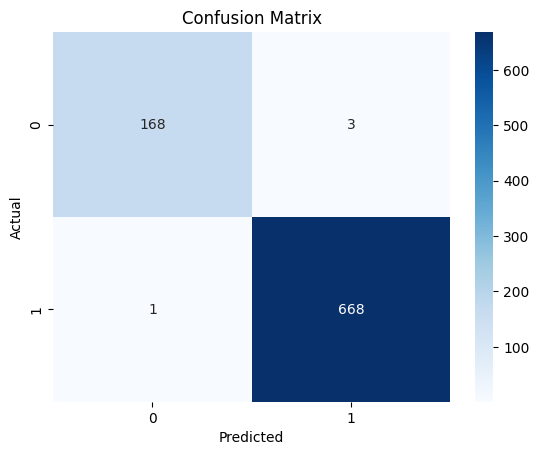

In [60]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, better_y_pred)

# Create a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [61]:
forest_importances = pd.Series(better_model.feature_importances_, index=x_train.columns)
forest_importances.sort_values(ascending=False)

,0
credit_score,156
loan_amount,117
annual_income,103
residential_av,97
luxury_av,69
inflation_rate,62
commercial_av,60
interest_rate,49
loan_term,45
dependents,40


# Model Deployment

In [62]:
import joblib

In [63]:
joblib.dump(better_model, 'loan_approval_model.pkl')


['loan_approval_model.pkl']

In [64]:
joblib.dump(rb_scaler, 'rb_scaler.pkl')


['rb_scaler.pkl']